In [1]:
!git clone https://github.com/MorningStarTM/Unet-in-AutoEncoder.git

Cloning into 'Unet-in-AutoEncoder'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 70 (delta 29), reused 63 (delta 26), pack-reused 0
Unpacking objects: 100% (70/70), 11.65 KiB | 662.00 KiB/s, done.


In [2]:
%cd /kaggle/working/Unet-in-AutoEncoder

/kaggle/working/Unet-in-AutoEncoder


In [3]:
!ls

LICENSE  README.md  notebook  unet_in_autoencoder


# Import libraries

In [4]:
from unet_in_autoencoder import build_unet
from unet_in_autoencoder import DataGenerator, read_data, show_images_with_masks
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import *
import tensorflow as tf
from glob import glob
import os

2024-07-24 05:32:22.867725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 05:32:22.867850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 05:32:22.991050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Read data

In [5]:
train_path = "/kaggle/input/multi-cancer/Multi Cancer/Brain Cancer"
test_path = "/kaggle/input/brain-tumor-mri-dataset"
train = glob(os.path.join(train_path, "*", "*"))
test = glob(os.path.join(test_path, "*", "*", "*"))
len(train), len(test)

(15000, 7023)

In [6]:
train_gen = DataGenerator(train, train)
test_gen = DataGenerator(test, test)

In [7]:
for x, y in train_gen:
    break
x.shape, y.shape

((16, 256, 256, 3), (16, 256, 256, 3))

# Visualize images

(-0.5, 255.5, 255.5, -0.5)

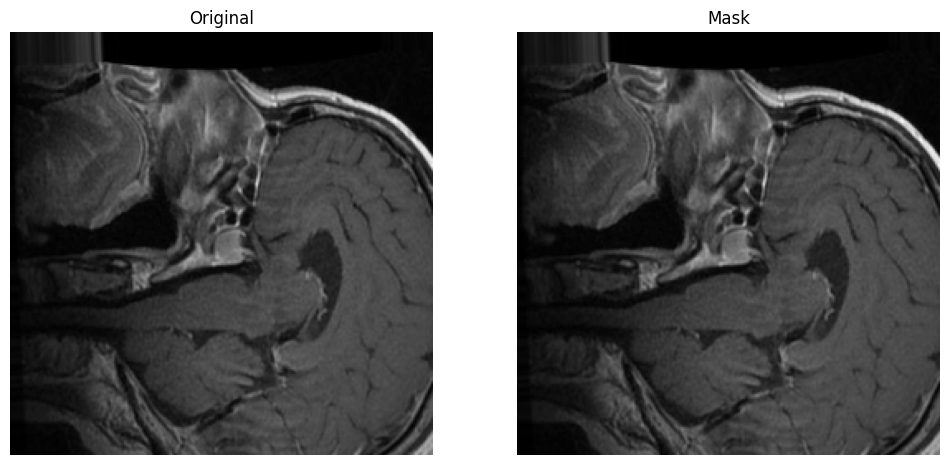

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(x[0])
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(y[0])
plt.title('Mask')
plt.axis('off')

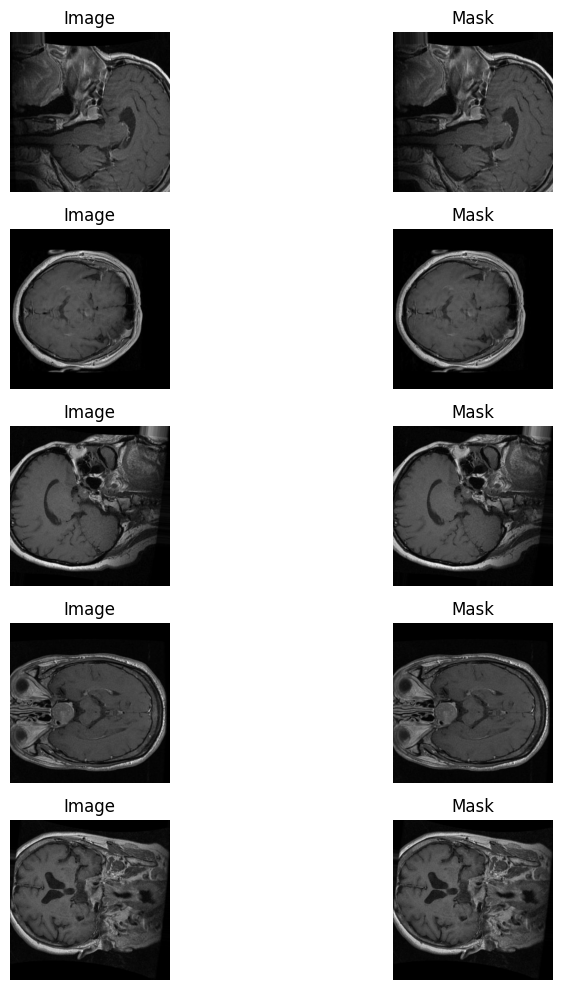

In [9]:
show_images_with_masks(train, train)

# Model

In [10]:
input_shape = (256, 256, 3)
model = build_unet(input_shape)
model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ activation_3[0][

 Total params: 3,838,563 (14.64 MB)

 Trainable params: 3,835,619 (14.63 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [11]:
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))

model.compile(loss=ssim_loss, optimizer=Adam(1e-4))

In [12]:
model_path = "/kaggle/working/unet.keras"
csv_path = "/kaggle/working/model.csv"

Callbacks = [
    ModelCheckpoint(model_path, verbose=1, save_best_only=True), 
    CSVLogger(csv_path),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
]

In [13]:
history = model.fit(train_gen, validation_data=test_gen, epochs = 25, verbose=1, callbacks=Callbacks)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-24 05:33:04.908352: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.1309, expected 2.65729
2024-07-24 05:33:04.908524: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27392: 3.36129, expected 2.88768
2024-07-24 05:33:04.908588: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38656: 3.56606, expected 3.09244
2024-07-24 05:33:04.909167: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 131072: 2.58553, expected 1.63582
2024-07-24 05:33:04.909193: E external/local_xla/xla/service/gpu/buffer_comp

  1/937 ━━━━━━━━━━━━━━━━━━━━ 8:06:09 31s/step - loss: 0.9185

I0000 00:00:1721799204.460003     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 0.4068
Epoch 1: val_loss improved from inf to 0.03175, saving model to /kaggle/working/unet.keras
937/937 ━━━━━━━━━━━━━━━━━━━━ 337s 327ms/step - loss: 0.4067 - val_loss: 0.0318 - learning_rate: 1.0000e-04
Epoch 2/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0424
Epoch 2: val_loss improved from 0.03175 to 0.00763, saving model to /kaggle/working/unet.keras
937/937 ━━━━━━━━━━━━━━━━━━━━ 143s 151ms/step - loss: 0.0424 - val_loss: 0.0076 - learning_rate: 1.0000e-04
Epoch 3/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0064
Epoch 3: val_loss improved from 0.00763 to 0.00360, saving model to /kaggle/working/unet.keras
937/937 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - loss: 0.0064 - val_loss: 0.0036 - learning_rate: 1.0000e-04
Epoch 4/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0040
Epoch 4: val_loss did not improve from 0.00360
937/937 ━━━━━━━━━━━━━━━━━━━━ 138s 146ms/step - loss: 0.0040 - val_loss: 0.0045 - learn


KeyboardInterrupt



In [14]:
model.load_weights(model_path)

In [15]:
import cv2
import numpy as np
img = cv2.imread(test[0])
img = cv2.resize(img, (256,256))
img = img / 255.
img = np.expand_dims(img, axis=0)
pred = model.predict(img)

2024-07-24 05:59:34.712595: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 3.21834, expected 2.7814
2024-07-24 05:59:34.712657: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65568: 3.26727, expected 2.83033
2024-07-24 05:59:34.712667: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65715: 3.18355, expected 2.74662
2024-07-24 05:59:34.714122: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 393216: 3.19018, expected 2.45051
2024-07-24 05:59:34.714151: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 393217: 5.27948, expected 4.5398
2024-07-24 05:59:34.714159: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 393218: 5.16353, expected 4.42385
2024-07-24 05:59:34.714167: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 393219: 5.87278, expected 5.1331
2024-07-24 05:59:34.714175

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


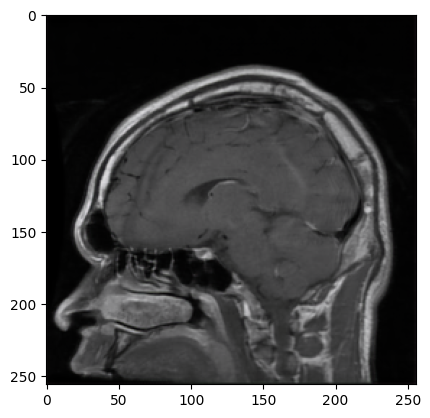

In [16]:
import matplotlib.pyplot as plt
plt.imshow(pred[0])